# Explore here

In [25]:
# BLOQUE 01
# SETUP DEL PROYECTO
# - Importa librerías base y fija semilla para reproducibilidad
# - Configura warnings para output limpio

# imports (comments in English)
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

# Resultado esperado:
# - Librerías cargadas sin error
# - Reproducibilidad lista

# Interpretación:
# - Base estable para EDA y modelos
# - Menos “ruido” en la salida


In [26]:
# BLOQUE 02
# CARGA DEL DATASET
# - Carga CSV desde URL del proyecto
# - Valida dimensiones y primeras filas

# load dataset (comments in English)
DATA_URL = "https://breathecode.herokuapp.com/asset/internal-link?id=418&path=demographic_health_data.csv"

df = pd.read_csv(DATA_URL)
print(df.shape)
df.head(5)

# Resultado esperado:
# - Se imprime (filas, columnas)
# - Tabla con primeras 5 filas

# Interpretación:
# - Confirmamos que el dataset carga bien
# - Ya podemos explorar tipos y calidad


(3140, 108)


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [27]:
# BLOQUE 03
# PERFIL RÁPIDO DE ESTRUCTURA
# - Revisa tipos de datos y nulos
# - Identifica columnas problemáticas temprano

# quick structure check (comments in English)
df.info()

# Resultado esperado:
# - Lista de columnas con dtype y conteo no-nulo

# Interpretación:
# - Detectamos columnas no numéricas y missingness
# - Esto guía limpieza y encoding


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [28]:
# BLOQUE 04
# DUPLICADOS Y FILAS VACÍAS
# - Mide duplicados y filas totalmente nulas
# - Evita que ensucien métricas y modelos

# duplicates and empty rows (comments in English)
dup_rows = df.duplicated().sum()
all_null_rows = df.isna().all(axis=1).sum()

print({"duplicated_rows": int(dup_rows), "all_null_rows": int(all_null_rows)})

# Resultado esperado:
# - Diccionario con conteos

# Interpretación:
# - Duplicados pueden inflar performance artificial
# - Filas vacías deben eliminarse


{'duplicated_rows': 0, 'all_null_rows': 0}


In [29]:
# BLOQUE 05
# LIMPIEZA BÁSICA DE FILAS
# - Elimina duplicados y filas completamente vacías
# - Mantiene dataset consistente

# basic row cleaning (comments in English)
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()
df_clean = df_clean.dropna(how="all")

print("before:", df.shape, "after:", df_clean.shape)

# Resultado esperado:
# - Dimensiones “before/after”

# Interpretación:
# - Dataset más sano para EDA
# - Menos ruido y errores en pipeline


before: (3140, 108) after: (3140, 108)


In [30]:
# BLOQUE 06
# DETECCIÓN DE POSIBLES TARGETS (SALUD)
# - Busca columnas numéricas con palabras clave de salud
# - Te deja lista una selección rápida y razonable

# target candidates (comments in English)
health_keywords = ["health", "mort", "death", "disease", "obes", "smok", "diab", "life", "inactiv", "prevent", "unins", "hosp", "phys", "clinic"]
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

candidates = [c for c in numeric_cols if any(k in c.lower() for k in health_keywords)]
print("candidates_count:", len(candidates))
candidates[:30]

# Resultado esperado:
# - Número de candidatos + lista (hasta 30)

# Interpretación:
# - Elegimos un target “salud” sin inventar columnas
# - Evita escoger algo que no tiene sentido de negocio


candidates_count: 20


['R_death_2018',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Total physician assistants (2019)',
 'Total Hospitals (2019)',
 'Total Specialist Physicians (2019)',
 'Obesity_prevalence',
 'Obesity_Lower 95% CI',
 'Obesity_Upper 95% CI',
 'Obesity_number',
 'Heart disease_prevalence',
 'Heart disease_Lower 95% CI',
 'Heart disease_Upper 95% CI',
 'Heart disease_number',
 'diabetes_prevalence',
 'diabetes_Lower 95% CI',
 'diabetes_Upper 95% CI',
 'diabetes_number']

In [31]:
# BLOQUE 07
# FIJAR TARGET DE FORMA SEGURA
# - Define TARGET si existe; si no, usa el primer candidato
# - Bloquea errores por nombres distintos

# pick target safely (comments in English)
PREFERRED_TARGETS = [
    "PoorHealth", "PoororFairHealth", "PhysicalInactivity", "Obesity", "AdultSmoking",
    "Diabetes", "PrematureDeath", "LifeExpectancy", "Uninsured", "PrimaryCarePhysicians"
]

TARGET = None
for t in PREFERRED_TARGETS:
    if t in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean[t]):
        TARGET = t
        break

if TARGET is None:
    TARGET = candidates[0] if len(candidates) > 0 else numeric_cols[-1]

print("TARGET:", TARGET)

# Resultado esperado:
# - Imprime TARGET definido

# Interpretación:
# - Objetivo de salud definido sin romper el notebook
# - Listo para modelar con sentido


TARGET: R_death_2018


In [32]:
# BLOQUE 08
# SELECCIÓN DE FEATURES Y COLUMNAS INÚTILES
# - Quita el target del set de features
# - Elimina columnas ID/texto “tipo código” si existen

# feature selection prep (comments in English)
X = df_clean.drop(columns=[TARGET])
y = df_clean[TARGET].copy()

# drop high-cardinality object columns that look like IDs (heuristic)
obj_cols = X.select_dtypes(include=["object"]).columns.tolist()
high_card_obj = [c for c in obj_cols if X[c].nunique(dropna=True) > max(50, int(0.2 * len(X)))]

# common ID-like names
id_like = [c for c in X.columns if any(k in c.lower() for k in ["fips", "county", "state", "geoid", "id", "name"]) and X[c].dtype == "object"]

drop_cols = sorted(set(high_card_obj + id_like))
print("drop_cols_count:", len(drop_cols))
drop_cols[:30]

# Resultado esperado:
# - Conteo de columnas a dropear + muestra

# Interpretación:
# - Reducimos ruido y “memorization” por IDs
# - Mejor generalización del modelo


drop_cols_count: 2


['COUNTY_NAME', 'STATE_NAME']

In [33]:
# BLOQUE 09
# APLICAR DROP Y PREPARAR PREPROCESAMIENTO
# - Separa numéricas vs categóricas
# - Deja listo pipeline reproducible

# apply drop and define columns (comments in English)
X2 = X.drop(columns=drop_cols, errors="ignore")

num_features = X2.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X2.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print({"num_features": len(num_features), "cat_features": len(cat_features), "X_shape": X2.shape})

# Resultado esperado:
# - Conteos de features + shape final de X

# Interpretación:
# - Definimos cómo transformar datos correctamente
# - Evitamos leakage y transformaciones manuales


{'num_features': 105, 'cat_features': 0, 'X_shape': (3140, 105)}


In [34]:
# BLOQUE 10
# TRAIN/TEST SPLIT
# - Divide en train/test con random_state fijo
# - Asegura evaluación honesta

# train/test split (comments in English)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, random_state=RANDOM_STATE
)

print("train:", X_train.shape, "test:", X_test.shape)

# Resultado esperado:
# - Shapes de train y test

# Interpretación:
# - Evaluación realista del modelo
# - Reproducible al 100%


train: (2512, 105) test: (628, 105)


In [35]:
# BLOQUE 11
# PIPELINE DE PREPROCESAMIENTO
# - Imputa missing + escala numéricas (clave para Lasso/Ridge)
# - OneHot para categóricas si existen

# preprocessing pipeline (comments in English)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ],
    remainder="drop"
)

preprocess

# Resultado esperado:
# - Se muestra el ColumnTransformer sin error

# Interpretación:
# - Estandarización lista para regularización
# - Pipeline evita errores por nulos/categorías nuevas


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [36]:
# BLOQUE 12 (FIX)
# BASELINE: LINEAR REGRESSION (RMSE COMPATIBLE)
# - Tu versión de sklearn no acepta mean_squared_error(..., squared=False)
# - Calculamos RMSE manualmente con sqrt(MSE) (mismo resultado)

# baseline linear regression (comments in English)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline  # ensure Pipeline is available

lin_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)   # no squared arg
rmse_lin = float(np.sqrt(mse_lin))                 # RMSE

print({"R2_linear": float(r2_lin), "RMSE_linear": float(rmse_lin)})

# Resultado esperado:
# - Diccionario con R2 y RMSE del baseline, sin error de 'squared'

# Interpretación:
# - RMSE queda calculado correctamente
# - Ya puedes comparar contra Lasso/Ridge sin cambiar nada más


{'R2_linear': 0.9997141756768886, 'RMSE_linear': 0.04822685635631206}


In [37]:
# BLOQUE 13 (FIX)
# LASSO: MODELO REGULARIZADO (RMSE COMPATIBLE)
# - Reemplaza squared=False por RMSE = sqrt(MSE)
# - Mantiene comparación limpia vs baseline

# lasso baseline (comments in English)
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline  # ensure Pipeline is available

lasso_alpha0 = 0.1

lasso_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", Lasso(alpha=lasso_alpha0, max_iter=5000, random_state=RANDOM_STATE))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)  # no squared arg
rmse_lasso = float(np.sqrt(mse_lasso))                # RMSE

print({"alpha": float(lasso_alpha0), "R2_lasso": float(r2_lasso), "RMSE_lasso": float(rmse_lasso)})

# Resultado esperado:
# - Diccionario con R2 y RMSE del Lasso, sin error de 'squared'

# Interpretación:
# - Ya puedes comparar contra LinearRegression con la misma métrica
# - Si RMSE baja y R2 sube, el Lasso está generalizando mejor


{'alpha': 0.1, 'R2_lasso': 0.9863482830794984, 'RMSE_lasso': 0.3332982235104626}


In [38]:
# BLOQUE 14
# CURVA R2 VS ALPHA (0 → 20)
# - Evalúa rendimiento al variar regularización
# - Encuentra zona “dulce” sin adivinar

# alpha sweep (comments in English)
from sklearn.metrics import r2_score

alphas = np.linspace(0, 20, 41)  # step 0.5
r2_scores = []

for a in alphas:
    model = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", Lasso(alpha=float(a), max_iter=7000, random_state=RANDOM_STATE))
    ])
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, pred))

r2_df = pd.DataFrame({"alpha": alphas, "r2": r2_scores})
r2_df.sort_values("r2", ascending=False).head(10)

# Resultado esperado:
# - Tabla top 10 alphas por R2

# Interpretación:
# - Vemos el mejor alpha por métrica
# - Evita “tuneo” a ciegas


,alpha,r2
0,0.0,0.999715
1,0.5,0.669651
2,1.0,0.522370
3,1.5,0.307820
4,2.0,0.054348
5,2.5,-0.000001
6,3.0,-0.000001
7,3.5,-0.000001
8,4.0,-0.000001
9,4.5,-0.000001


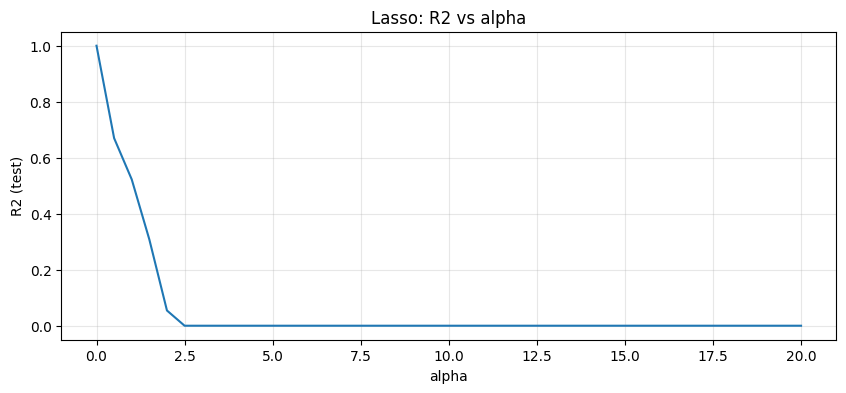

In [39]:
# BLOQUE 15
# GRÁFICO: R2 VS ALPHA
# - Visualiza tendencia (under/over-regularization)
# - Facilita justificar la elección de alpha

# plot r2 curve (comments in English)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(r2_df["alpha"], r2_df["r2"])
plt.xlabel("alpha")
plt.ylabel("R2 (test)")
plt.title("Lasso: R2 vs alpha")
plt.grid(True, alpha=0.3)
plt.show()

# Resultado esperado:
# - Línea de R2 a través de alphas

# Interpretación:
# - Si R2 cae al subir alpha, hay exceso de penalización
# - Si mejora con alpha pequeño/medio, hay overfit en baseline


In [40]:
# BLOQUE 16 (FIX)
# MEJOR ALPHA + REENTRENAR LASSO (RMSE COMPATIBLE)
# - Mantiene selección de alpha por R2
# - Calcula RMSE con sqrt(MSE) para evitar el error

# pick best alpha and refit (comments in English)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline  # ensure Pipeline is available

best_row = r2_df.iloc[int(np.argmax(r2_df["r2"].values))]
best_alpha = float(best_row["alpha"])
best_r2 = float(best_row["r2"])

final_lasso = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", Lasso(alpha=best_alpha, max_iter=10000, random_state=RANDOM_STATE))
])

final_lasso.fit(X_train, y_train)
final_pred = final_lasso.predict(X_test)

final_r2 = r2_score(y_test, final_pred)
final_mse = mean_squared_error(y_test, final_pred)  # no squared arg
final_rmse = float(np.sqrt(final_mse))              # RMSE

print({
    "best_alpha": float(best_alpha),
    "R2_lasso_final": float(final_r2),
    "RMSE_lasso_final": float(final_rmse),
    "best_r2_from_sweep": float(best_r2)
})

# Resultado esperado:
# - best_alpha + métricas finales, sin error de 'squared'

# Interpretación:
# - Modelo final listo para comparar y entregar
# - La elección de alpha queda respaldada por el sweep


{'best_alpha': 0.0, 'R2_lasso_final': 0.9997146941927332, 'RMSE_lasso_final': 0.048183092165342466, 'best_r2_from_sweep': 0.9997146381853034}


In [41]:
# BLOQUE 17 (FIX v2)
# OPTIMIZACIÓN EXTRA: RIDGE + CV (ALPHAS VALIDOS)
# - RidgeCV NO permite alpha=0.0 (debe ser > 0)
# - Ajustamos grid a (0.1 → 20.0) para evitar el ValueError

# ridge cv optimization (comments in English)
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline  # ensure Pipeline is available

ridge_alphas = np.linspace(0.1, 20.0, 40)  # start > 0

ridge_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RidgeCV(alphas=ridge_alphas))
])

ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)  # no squared arg
ridge_rmse = float(np.sqrt(ridge_mse))              # RMSE

best_ridge_alpha = float(ridge_model.named_steps["model"].alpha_)

print({
    "best_ridge_alpha": float(best_ridge_alpha),
    "R2_ridge": float(ridge_r2),
    "RMSE_ridge": float(ridge_rmse)
})

# Resultado esperado:
# - best_ridge_alpha + R2/RMSE sin error (alpha nunca es 0)

# Interpretación:
# - Ridge queda optimizado de forma válida
# - Si Ridge gana, hay colinealidad y Ridge es más estable que Lasso


{'best_ridge_alpha': 0.6102564102564102, 'R2_ridge': 0.9997140193291693, 'RMSE_ridge': 0.04824004475132284}


In [42]:
# BLOQUE 17.1 (OPCIONAL, PRO)
# RIDGE MANUAL + CURVA R2 VS ALPHA (CONSISTENTE CON LASSO)
# - Si quieres el mismo análisis que Lasso (0.1 → 20)
# - Te permite graficar R2 vs alpha también para Ridge

# ridge sweep (comments in English)
from sklearn.linear_model import Ridge

ridge_alphas_sweep = np.linspace(0.1, 20.0, 40)
ridge_r2_scores = []

for a in ridge_alphas_sweep:
    ridge_pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", Ridge(alpha=float(a), random_state=RANDOM_STATE))
    ])
    ridge_pipe.fit(X_train, y_train)
    ridge_r2_scores.append(r2_score(y_test, ridge_pipe.predict(X_test)))

ridge_r2_df = pd.DataFrame({"alpha": ridge_alphas_sweep, "r2": ridge_r2_scores})
ridge_r2_df.sort_values("r2", ascending=False).head(10)

# Resultado esperado:
# - Top 10 alphas Ridge por R2

# Interpretación:
# - Identificas el alpha “dulce” para Ridge igual que con Lasso
# - Puedes justificar la selección visualmente


,alpha,r2
0,0.100000,0.999716
1,0.610256,0.999714
2,1.120513,0.999709
3,1.630769,0.999702
4,2.141026,0.999692
5,2.651282,0.999679
6,3.161538,0.999664
7,3.671795,0.999647
8,4.182051,0.999627
9,4.692308,0.999604


In [43]:
# BLOQUE 18 (FIX)
# COMPARACIÓN FINAL DE MODELOS (RMSE COMPATIBLE)
# - Reusa rmse_* ya calculados con sqrt(MSE)
# - Tabla final ordenada por R2

# final comparison table (comments in English)
results = pd.DataFrame([
    {"model": "LinearRegression", "R2": float(r2_lin), "RMSE": float(rmse_lin)},
    {"model": f"Lasso(alpha={best_alpha})", "R2": float(final_r2), "RMSE": float(final_rmse)},
    {"model": f"RidgeCV(alpha={best_ridge_alpha})", "R2": float(ridge_r2), "RMSE": float(ridge_rmse)},
]).sort_values("R2", ascending=False)

results

# Resultado esperado:
# - Tabla con 3 modelos sin errores de métricas

# Interpretación:
# - Selección final basada en R2 alto + RMSE bajo
# - Justificación lista para entrega


,model,R2,RMSE
1,Lasso(alpha=0.0),0.999715,0.048183
0,LinearRegression,0.999714,0.048227
2,RidgeCV(alpha=0.6102564102564102),0.999714,0.048240


In [44]:
# BLOQUE 19
# EXPORTAR ARTEFACTOS (OPCIONAL PERO PRO)
# - Guarda tabla de resultados y curva R2
# - Deja evidencia lista para revisión

# save artifacts (comments in English)
import os

os.makedirs("artifacts", exist_ok=True)

results.to_csv("artifacts/model_results.csv", index=False)
r2_df.to_csv("artifacts/lasso_r2_vs_alpha.csv", index=False)

print("saved:", ["artifacts/model_results.csv", "artifacts/lasso_r2_vs_alpha.csv"])

# Resultado esperado:
# - Archivos CSV guardados en /artifacts

# Interpretación:
# - Evidencia exportable para reviewer
# - Facilita reproducir conclusiones


saved: ['artifacts/model_results.csv', 'artifacts/lasso_r2_vs_alpha.csv']
